# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [2 балла] Загрузка и предобработка данных - загрузите датасет, посмотрите на его `head` и `tail`. Выполните преобразование значений и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных. Для удобства отображения можно транспонировать получившийся датафрейм при помощи `.T()`
2. [1 балл] Сколько в выборке женщин-раковых больных? (Целевая переменная - `Dx:Cancer`)
3. [1 балл] Какой средний возраст женщин в выборке?
4. [2 балла] Правда ли, что у женщин с подтвержденным наличием рака, в среднем, выше возраст? Больше стаж курения? Больше число беременностей? Выясните это при помощи метода `groupby`. Вновь для удобства отображения получившийся датасет можно транспонировать при помощи `.T()`
5. [1 балл] Визуализация - Постройте гистограммы всех переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета. Какие два фактора наиболее сильно влияют на наличие рака?
7. [2 балла] Визуализация - При помощи `pairplot` постройте попарные графики для факторов, перечисленных в переменной `columns`. Окрасте точки в зависимости от наличия или отсутствия у женщины рака. 

## Итого - 10 баллов, отлично :)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
columns = ['Age', 'Number_of_sexual_partners', 
        'First_sexual_intercourse', 'STDs_(number)', 
        'Smokes(years)', 'Hormonal_Contraceptives (years)','IUD(years)', 'Dx_Cancer']

In [5]:
data = pd.read_excel('../datasets/anastasiaakchurina177_kopia.xlsx')

In [44]:
data = pd.read_excel('C:/Users/rm70/Desktop/anastasiaakchurina177_kopia.xlsx')
data 

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0
5,42,3,23,2,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
6,51,3,17,6,1,34,0,0,0,1,...,?,?,0,0,0,0,1,1,0,1
7,26,1,26,3,0,0,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
8,45,1,20,5,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0
9,44,3,15,?,1,1.26697,0,0,0,?,...,0,0,0,0,0,0,0,0,0,0


Так как в данных пропущенные и неизвестные значения заполняются при помощи знака вопроса `?`, давайте заменим его на что-то более числовое и логичное, например на ноль.

In [6]:
# заменяем значения
data = data.replace('?','0')
data = data.astype(float)

In [7]:
data.head(5)

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
data.tail(5)

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
853,34.0,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,32.0,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,25.0,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
856,33.0,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
857,29.0,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
data.describe()

,Age,Number_of_sexual_partners,First_sexual_intercourse,Num_of_pregnancies,Smokes,Smokes(years),Smokes(packs_year),Hormonal_Contraceptives,Hormonal_Contraceptives (years),IUD,...,STDs_Time since first diagnosis,STDs_Time_since_last_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.451049,16.856643,2.127040,0.143357,1.201241,0.330894,0.560606,354.579038,0.096737,...,0.508159,0.481352,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,1.698528,3.183491,1.508108,0.350641,4.060623,2.128571,0.496603,3890.189914,0.295771,...,2.388333,2.297125,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.820550,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,43226.000000,1.000000,...,22.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Комментарий к решению
Всё верно :)

In [52]:
print('Number of cancerous patients',data.loc[:,['Dx_Cancer']][data['Dx_Cancer'] == 1].count())
print('Mean age', data.Age.mean())

Number of cancerous patients Dx_Cancer    18
dtype: int64
Mean age 26.82051282051282


### Комментарий к решению
Тут все-таки было бы хорошо использовать groupby, так быстрее, но, безусловно, ответ верный :)

In [14]:
data.groupby('Dx_Cancer').mean().T

Dx_Cancer,0.0,1.0
Age,26.683333,33.222222
Number_of_sexual_partners,2.444048,2.777778
First_sexual_intercourse,16.826190,18.277778
Num_of_pregnancies,2.116667,2.611111
Smokes,0.144048,0.111111
Smokes(years),1.169839,2.666667
Smokes(packs_year),0.293746,2.064444
Hormonal_Contraceptives,0.557143,0.722222
Hormonal_Contraceptives (years),362.100684,3.568889
IUD,0.091667,0.333333


In [53]:
x = float(data.loc[:,['Age']][data['Dx_Cancer'] == 1].mean())
y = float(data.loc[:,['Age']][data['Dx_Cancer'] == 0].mean())
print('mean age of cancerous', x)
print('mean age of non cancerous', y)
print('The cancerous are older on average',x>y)

mean age of cancerous 33.22222222222222
mean age of non cancerous 26.683333333333334
The cancerous are older on average True


In [56]:
c = float(data.loc[:,['Smokes(years)']][data['Dx_Cancer'] == 1].mean())
d = float(data.loc[:,['Smokes(years)']][data['Dx_Cancer'] == 0].mean())
print('mean tenure of cancerous', c)
print('mean tenure of non cancerous', d)
print('The cancerous smoke more on average',c>d)


a = float(data.loc[:,['Num_of_pregnancies']][data['Dx_Cancer'] == 1].mean())
b = float(data.loc[:,['Num_of_pregnancies']][data['Dx_Cancer'] == 0].mean())
print('mean age of cancerous', a)
print('mean age of non cancerous', b)
print('The cancerous get pregnant more on average',a>b)

mean tenure of cancerous 2.6666666666666665
mean tenure of non cancerous 1.169838801946428
The cancerous smoke more on average True
mean age of cancerous 2.611111111111111
mean age of non cancerous 2.1166666666666667
The cancerous get pregnant more on average True


No handles with labels found to put in legend.


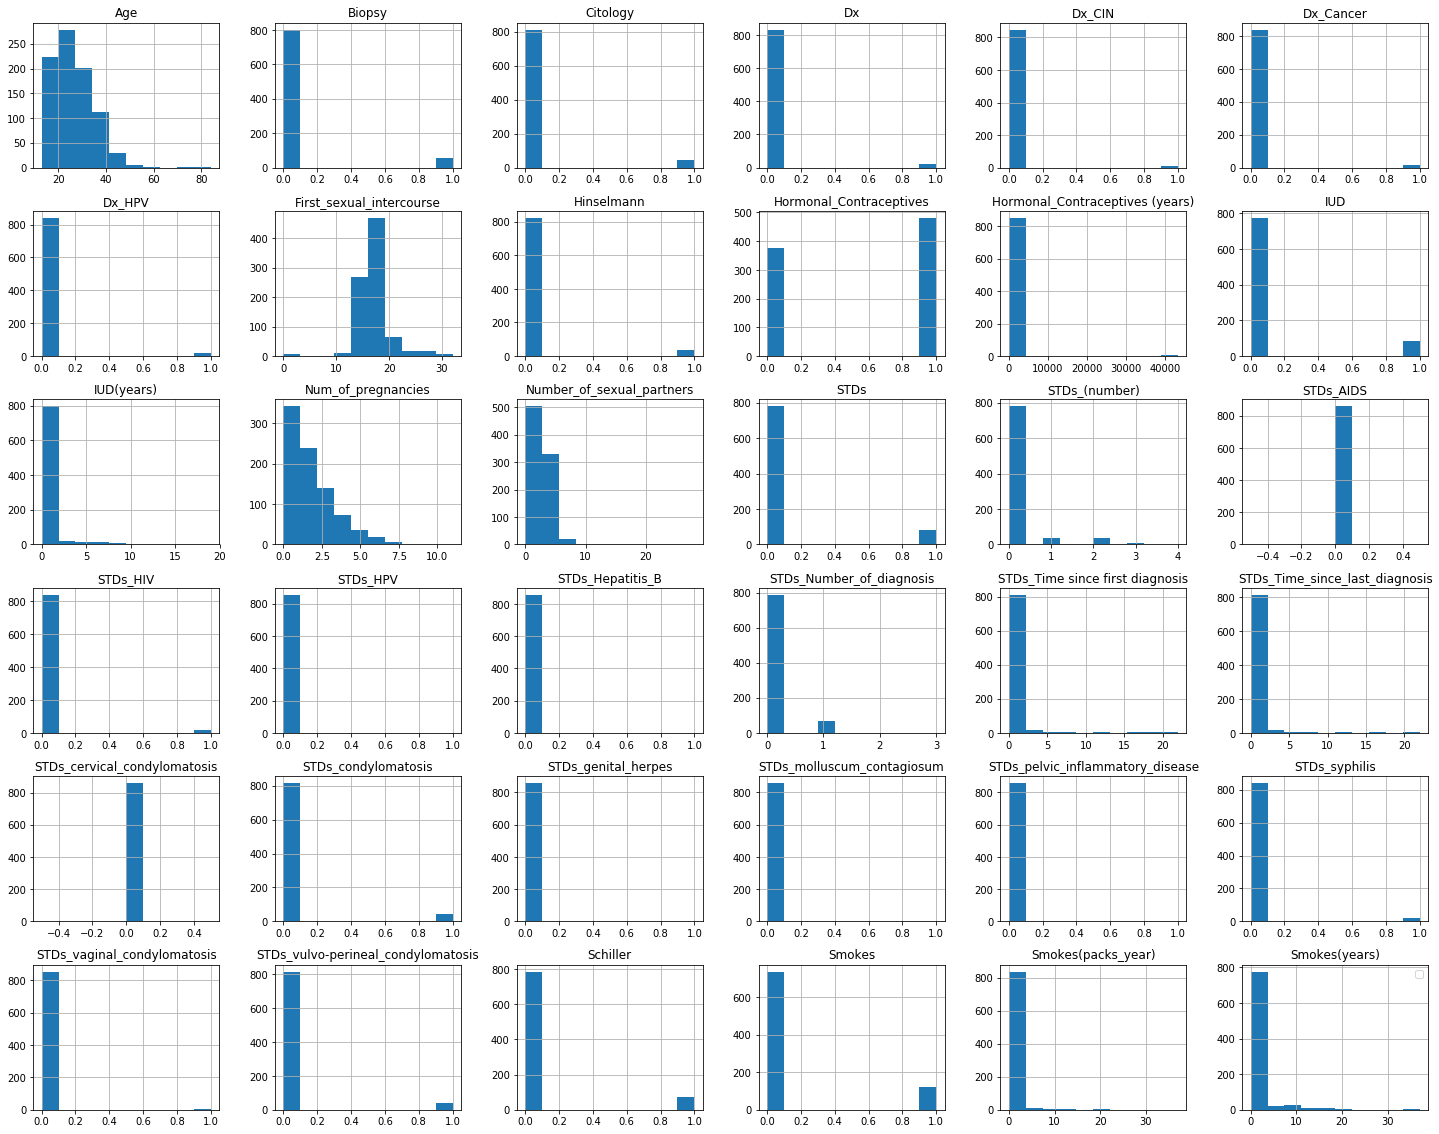

In [57]:
data.hist(figsize=(25,20));plt.legend()

In [58]:
print('Cредний возраст женщин в выборке',data.Age.mean())

Cредний возраст женщин в выборке 26.82051282051282


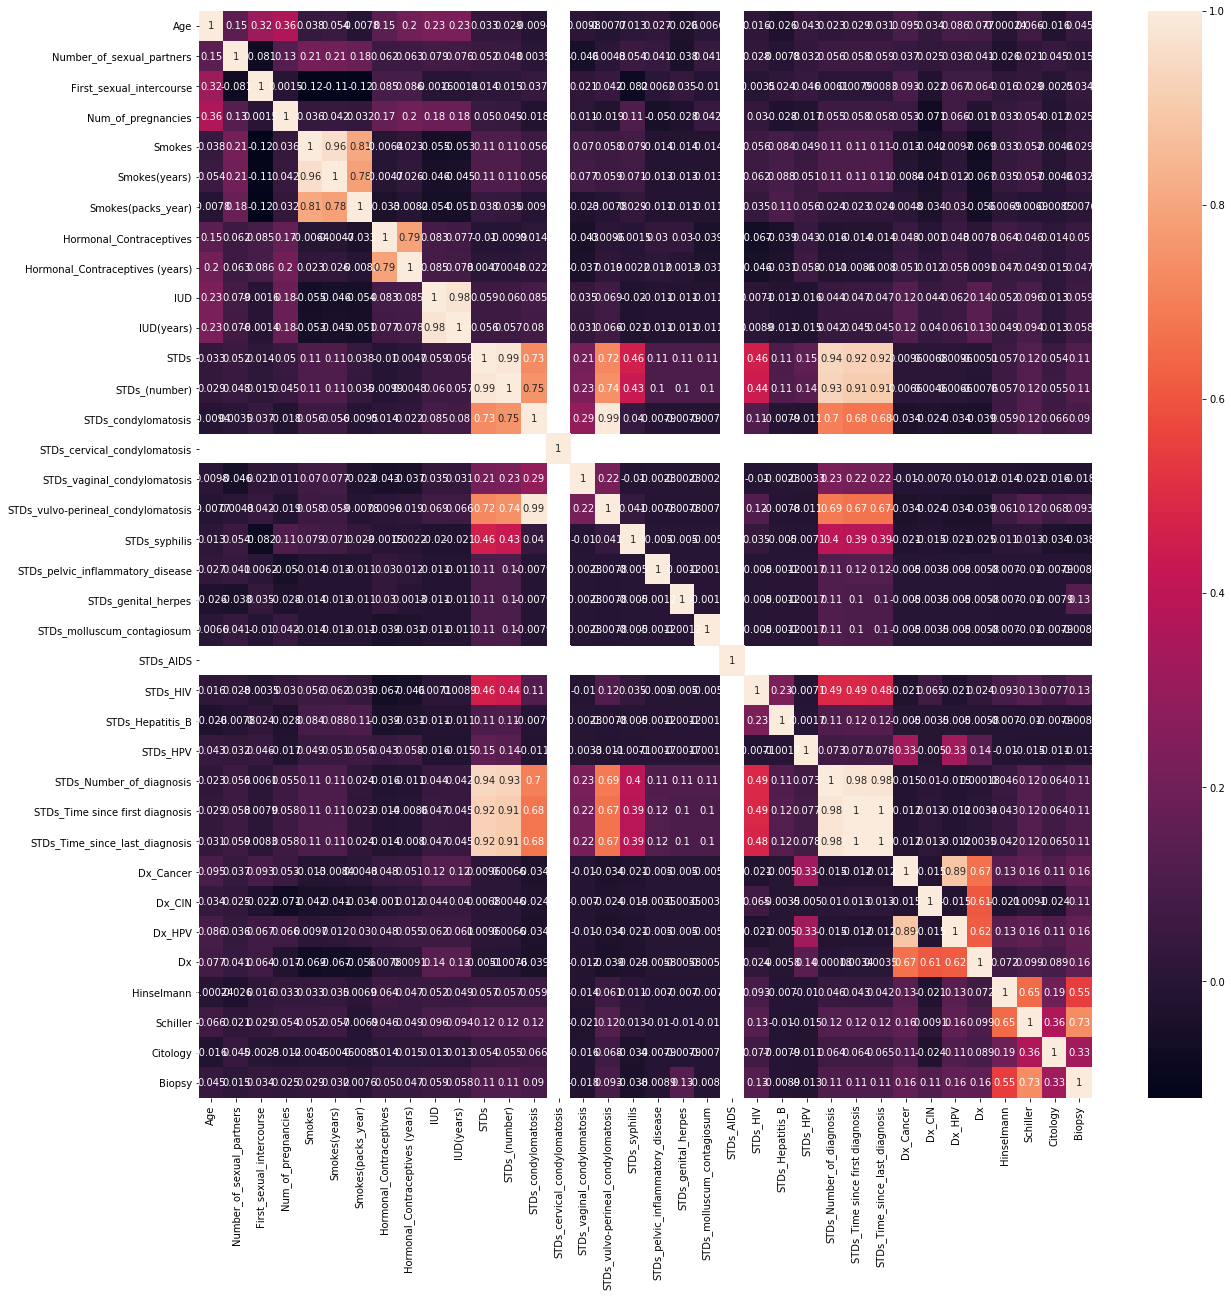

In [62]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr('kendall'), annot=True);

### Комментарий к решению
Всё хорошо, только для наглядности стоило выбрать колонки, заданные  вверху, чтобы график можно было прочитать  :)

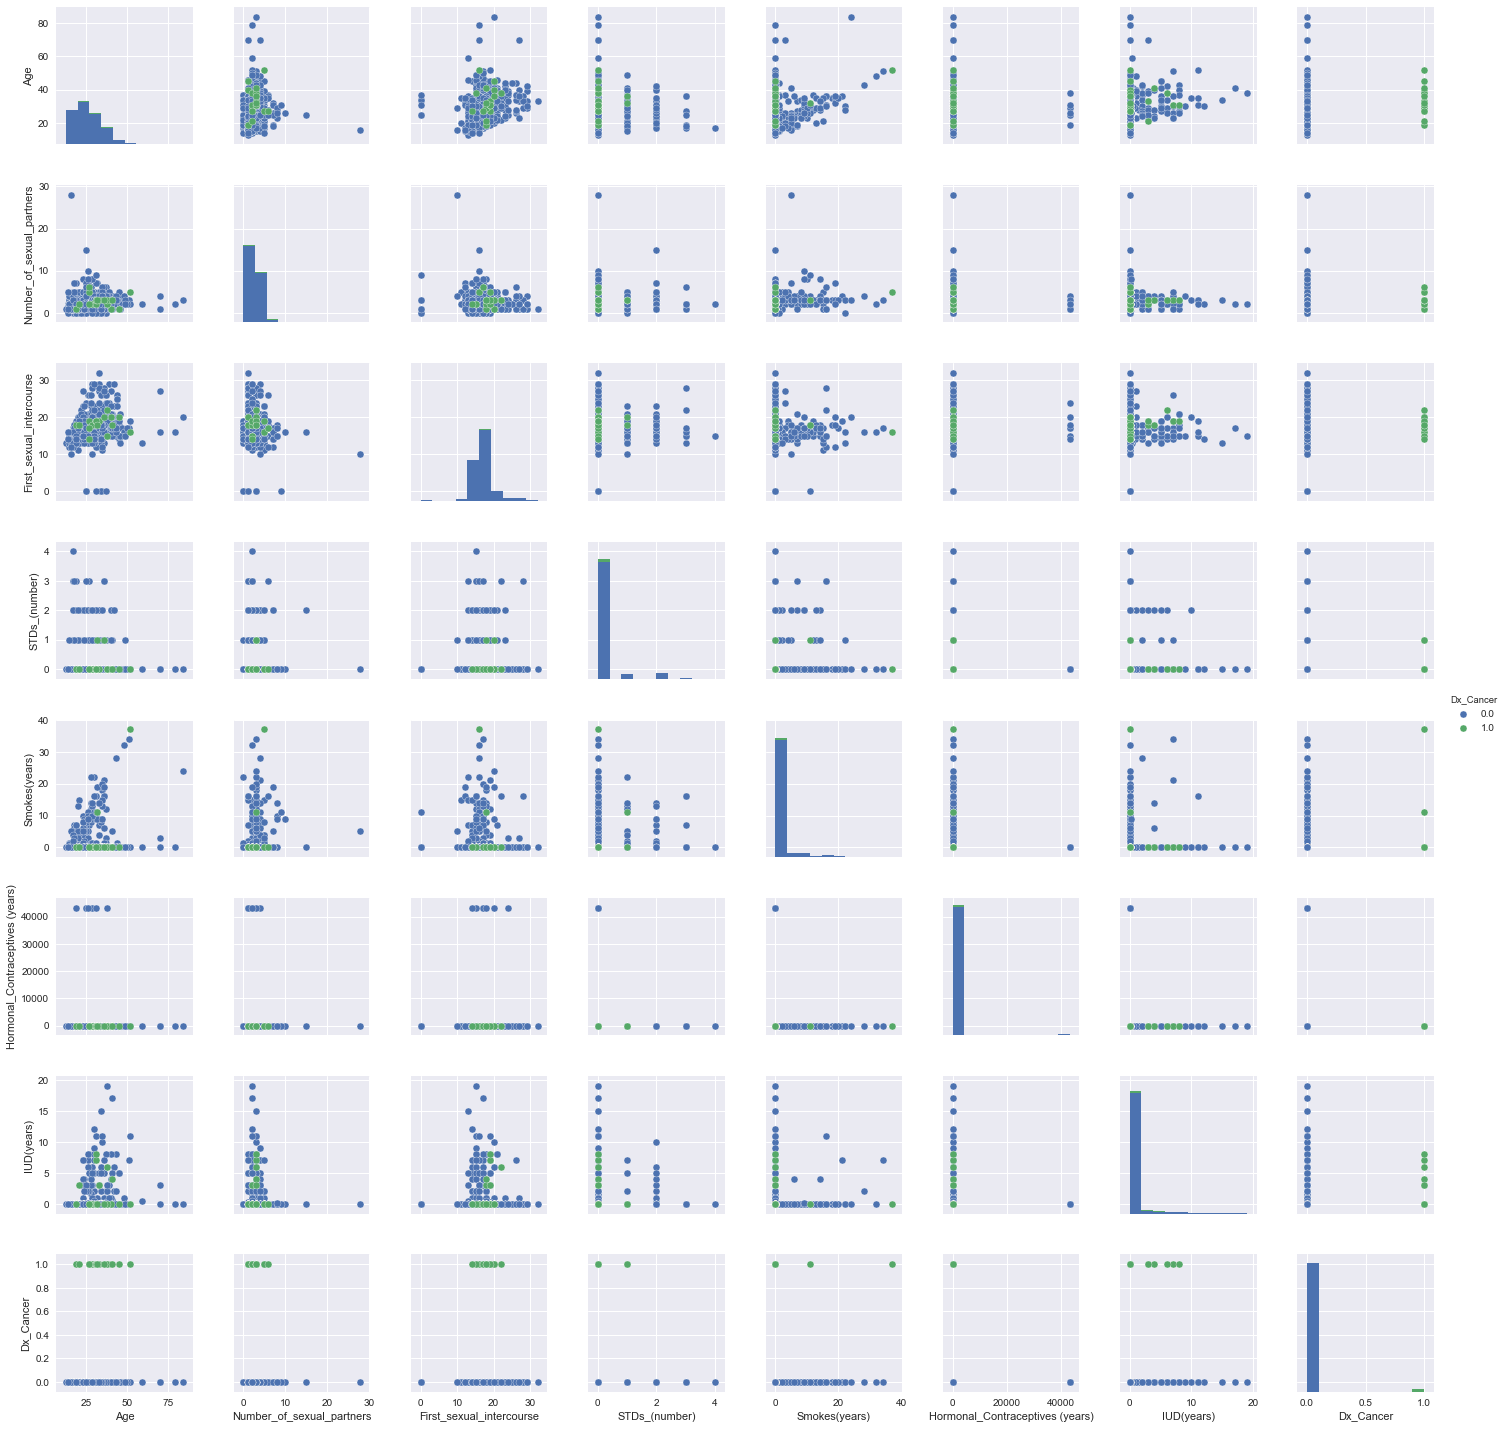

In [21]:
sns.pairplot(data[columns], hue='Dx_Cancer');

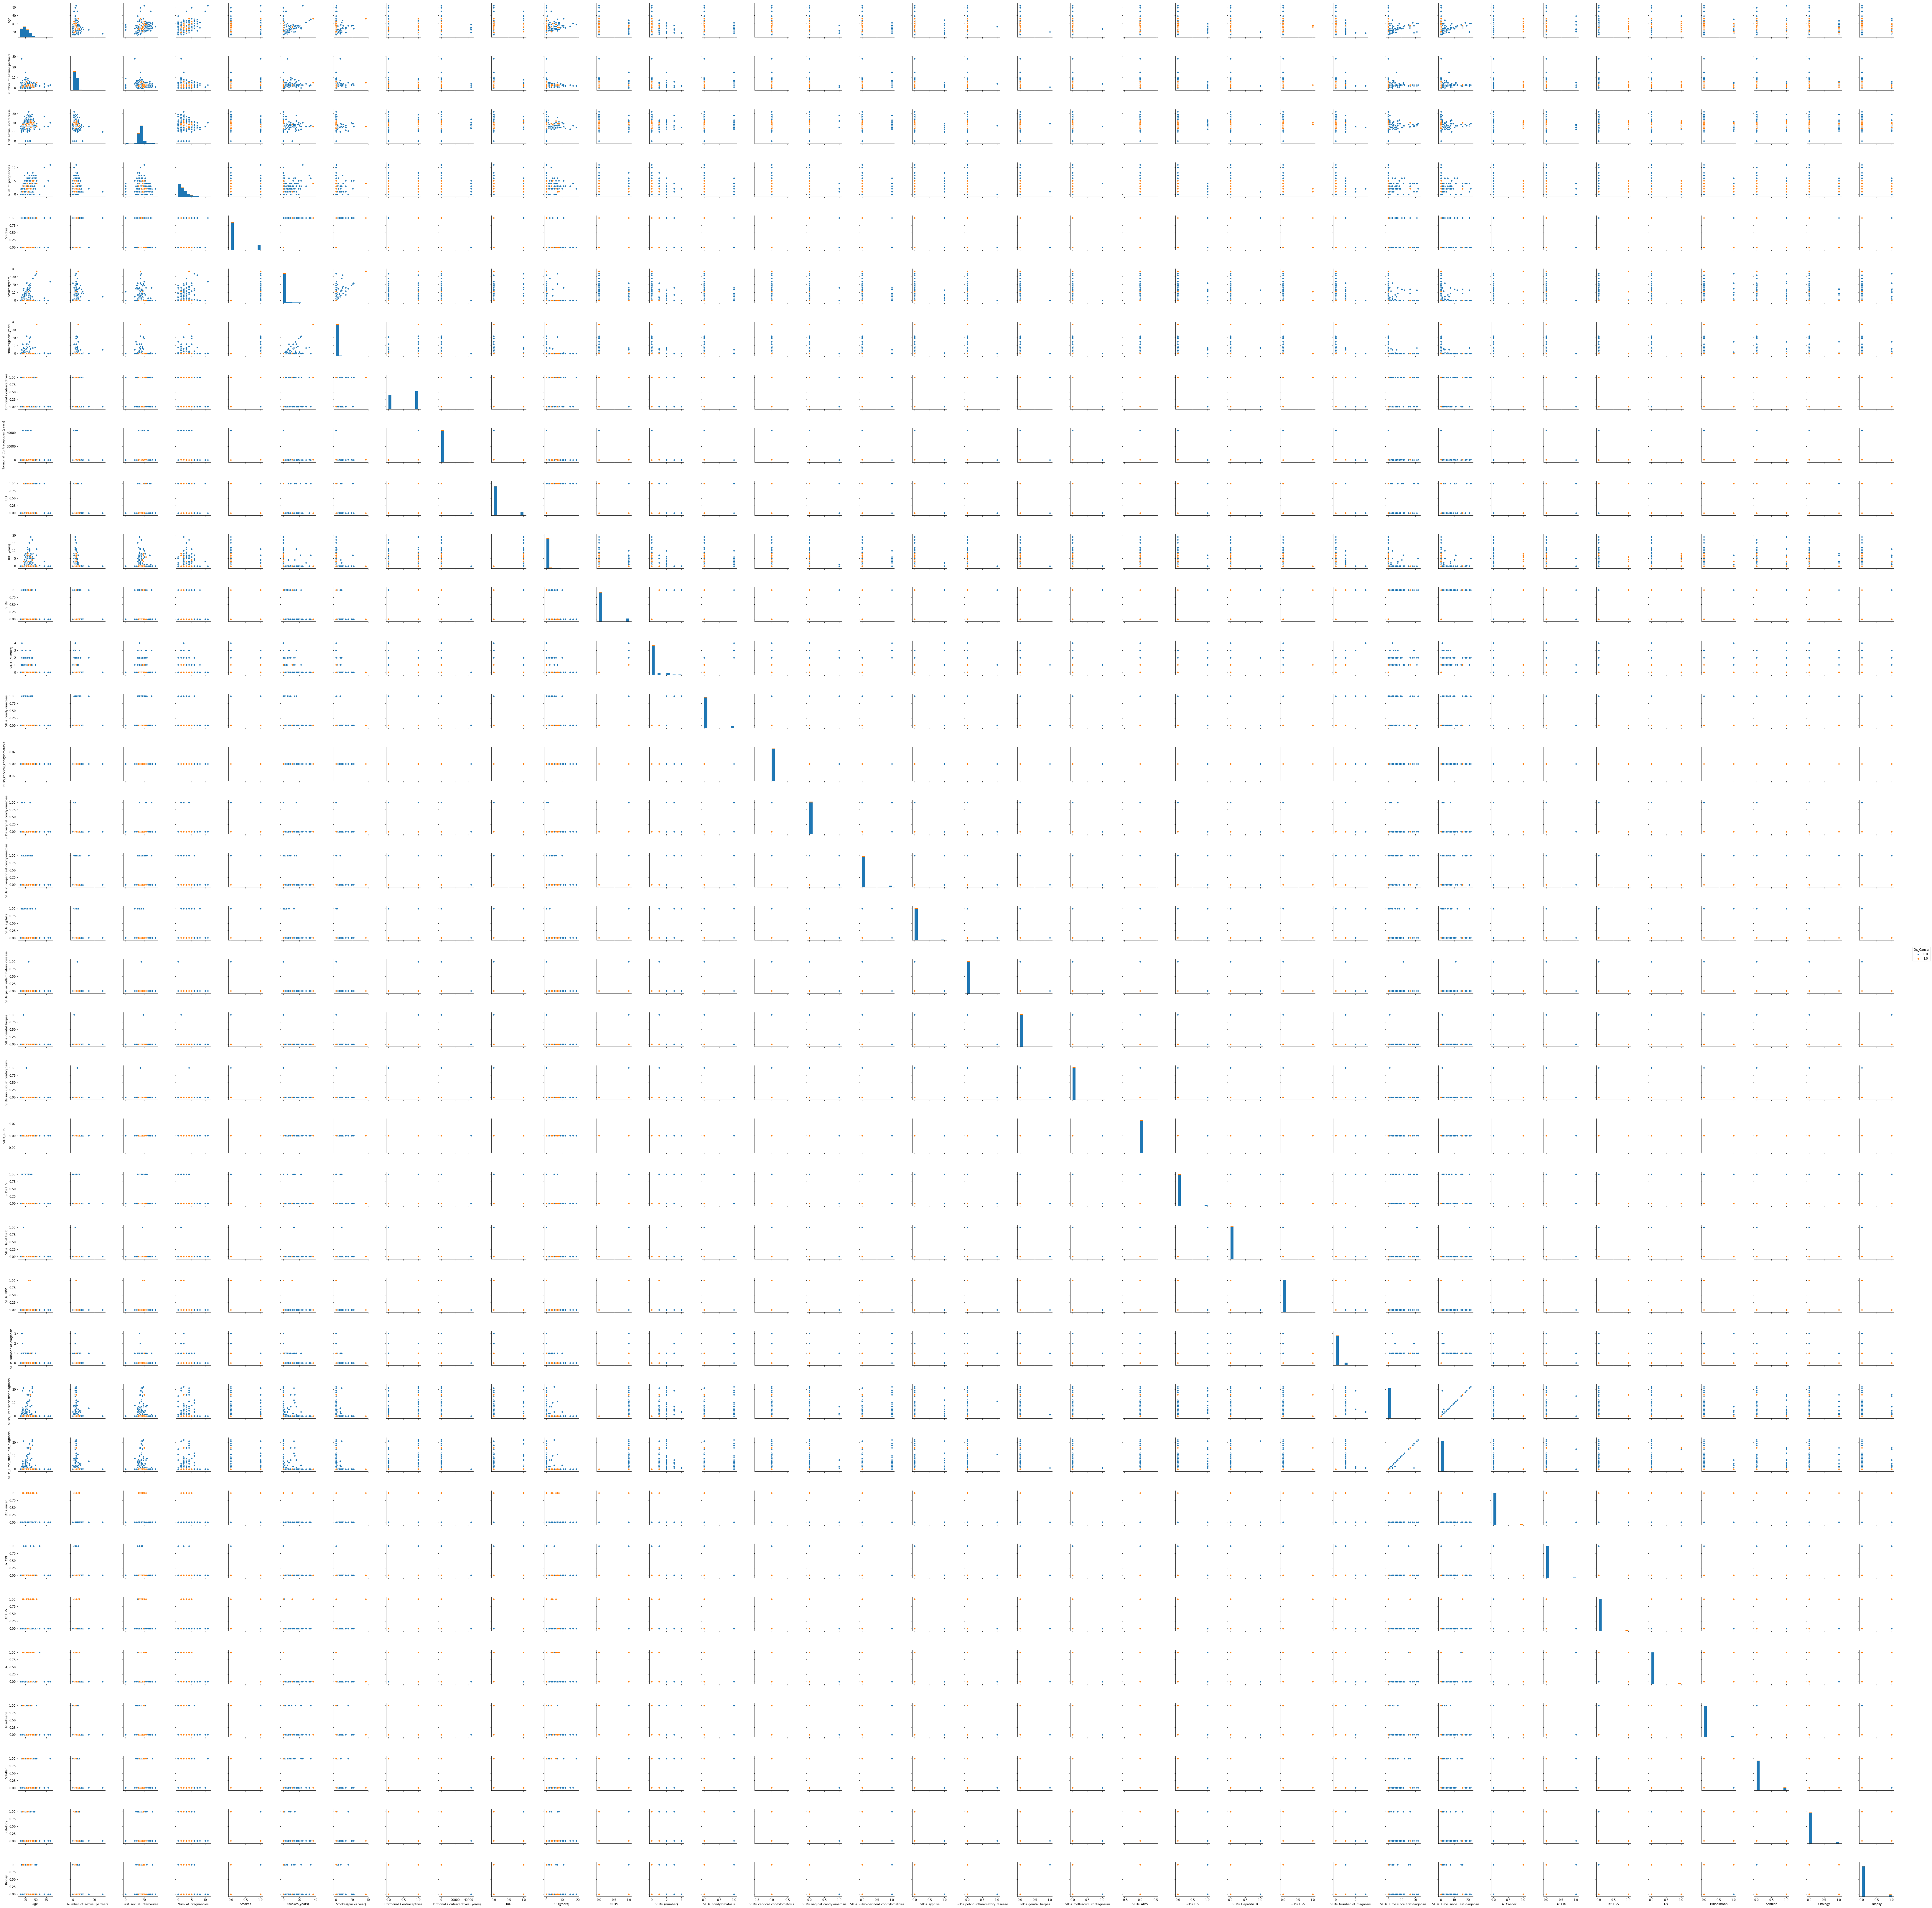

In [60]:
sns.pairplot(data, hue='Dx_Cancer')